<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_6_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install R package numOSL by Peng et al.
install.packages('numOSL')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# R-CODE 6.6 FITTING CW-IRSL DATA WITH THE KP-CW equation

CW-IRSL signals from feldspars can be described
with the Kitis-Pagonis (KP-CW) analytical equation:

\begin{equation}
I_{\textrm{CW-IRSL}}(t)=\frac{I_{0}\,F(t)^{2}\,e^{-\rho'(F(t))^{3}}}{1+zA\,t}+bgd\
\end{equation}

\begin{equation}
F_{\textrm{CW-IRSL}}(t)=\ln\left(1+zA\,t\right)
\end{equation}

where $z=$1.8 and the fitting parameters are the effective
rate constant $A$ (in s$^{-1}$) for the CW-IRSL process, the scaling
constant $I_{0}$, the dimensionless acceptor density $\rho'$ and
a constant experimental background $bgd$ (if necessary). Several
experimental studies have found that typical values of the infrared
stimulation rate $A$ are 1-10 s$^{-1}$, and that for feldspars in
the EST model, the typical values of the dimensionless density are
in the range $\rho'$=0.003-0.02 (see for example the comprehensive
study of 23 feldspar samples by Pagonis et al. {Pagonis2014d}. 

The following code fits a CW-IRSL experimental curve from the feldspar
sample KST4 studied by Kitis et al.{Kitis2016a}, and the least squares fitting result is shown below. 

The best fitting values in this example are

 $A=7.07$ s$^{-1}$, $I_{0}=2.72\times10^{4}$
cts/s, $\rho'=0.0073$ and $bgd=47.05$ cts/s.

Note the following practical detail: the analytical KP-CW equation
(\ref{eq:KP-CW1}) gives a non-physical answer of zero for the intensity
at time $t=0$, i.e. $I_{\textrm{CW-IRSL}}(0)=0$ . For this reason,
it is necessary that the file which contains the experimental data
starts at some value $t$\textgreater 0 (e.g. at time $t=1$ s),
and not at time $t=0.$ This is a necessary condition for the
fitting process to work correctly.



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Parameters from Least squares fit  
Imax=    1.53e+04     cts/s    A=    7.09     (s^-1)
rho= 0.007   bgd= 41.31  cts/s

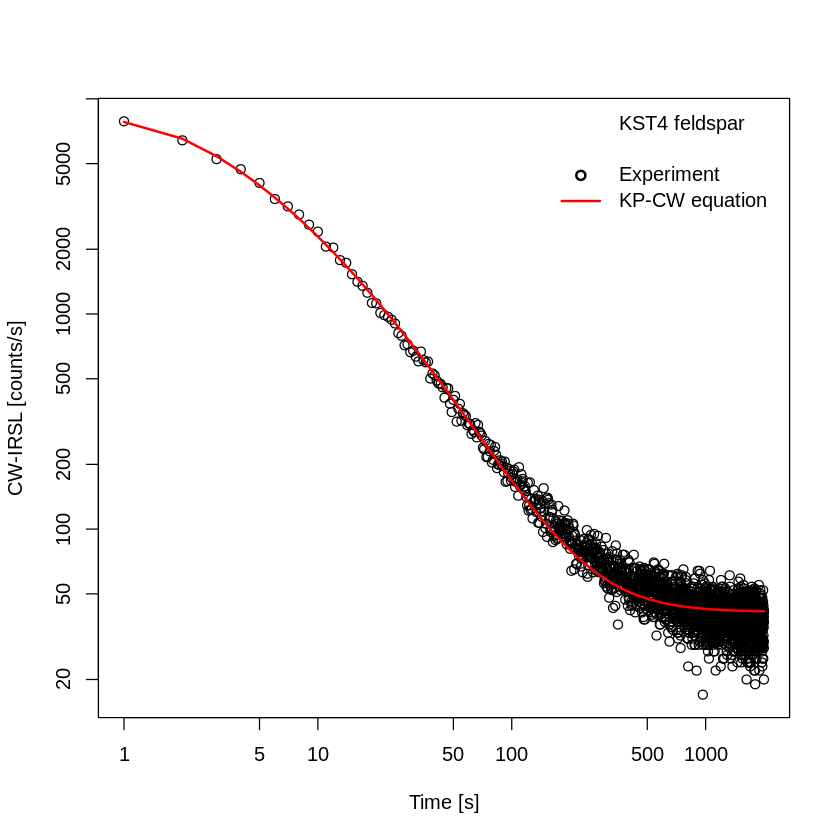

In [ ]:
#Fit CW-IRSL data with KP-CW equation
rm(list = ls(all=T))
options(warn=-1)
install.packages("minpack.lm")
library("minpack.lm")

## fit to analytical KP-CW equation for CW-IRSL (TLT model)


# Read (x,y) data from two files in GitHub
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/ph300s0IR.asc"
mydata <-read.table(url(filename))

t<-as.numeric(gsub(",", ".", gsub("\\.", "", mydata[,1])))
y<-as.numeric(gsub(",", ".", gsub("\\.", "", mydata[,3])))
mydata<-data.frame(t,y)

# plot the data
plot(t,y,log="xy",
xlab="Time [s]",ylab="CW-IRSL [counts/s]",col="black",pch=1)
fit_data <-mydata

# find best fit using minpack package
fit <- minpack.lm::nlsLM(
 formula=y~ imax*exp (-rho*(log(1 + A*t)) ** 3.0)*
    (log(1 + A*t) ** 2.0)/(1 +  t*A)+bgd,
  data = fit_data,
  start = list(imax=3,A=1.1,rho=0.03,bgd=min(y)))

# store best fit parameters
imax_fit <- coef(fit)[1]
A_fit <- coef(fit)[2]
rho_fit <- coef(fit)[3]
bgd_fit <- coef(fit)[4]

## plot analytical solution using best fit parameters
lines(
  x = t,
  y =imax_fit*exp (-rho_fit*(log(1 + A_fit*t)) ** 3.0)*
    (log(1 + A_fit*t) ** 2.0)/(1 +  t*A_fit)+bgd_fit,
  col = "red",lwd=2,log="xy")
legend("topright",bty="n", pch=c(NA,NA,1,NA),lwd=2,
lty=c(NA,NA,NA,"solid"),
c(expression('KST4 feldspar',' ',
'Experiment','KP-CW equation')),col=c(NA,NA,"black","red"))

## print results from best fit analysis with KP-CW equation
cat("Parameters from Least squares fit"," ")
cat("\nImax=",formatC(imax_fit,format="e",digits=2)," cts/s",
sep="    ","A=",round(A_fit,digits=2)," (s^-1)")
cat("\nrho=",round(rho_fit,digits=4),sep=" ",
"  bgd=",round(bgd_fit,digits=2)," cts/s")

# [Return to EURADOS website](https://blog.mcdaniel.edu/vasilispagonis/python-codes-for-eurados-2023/)